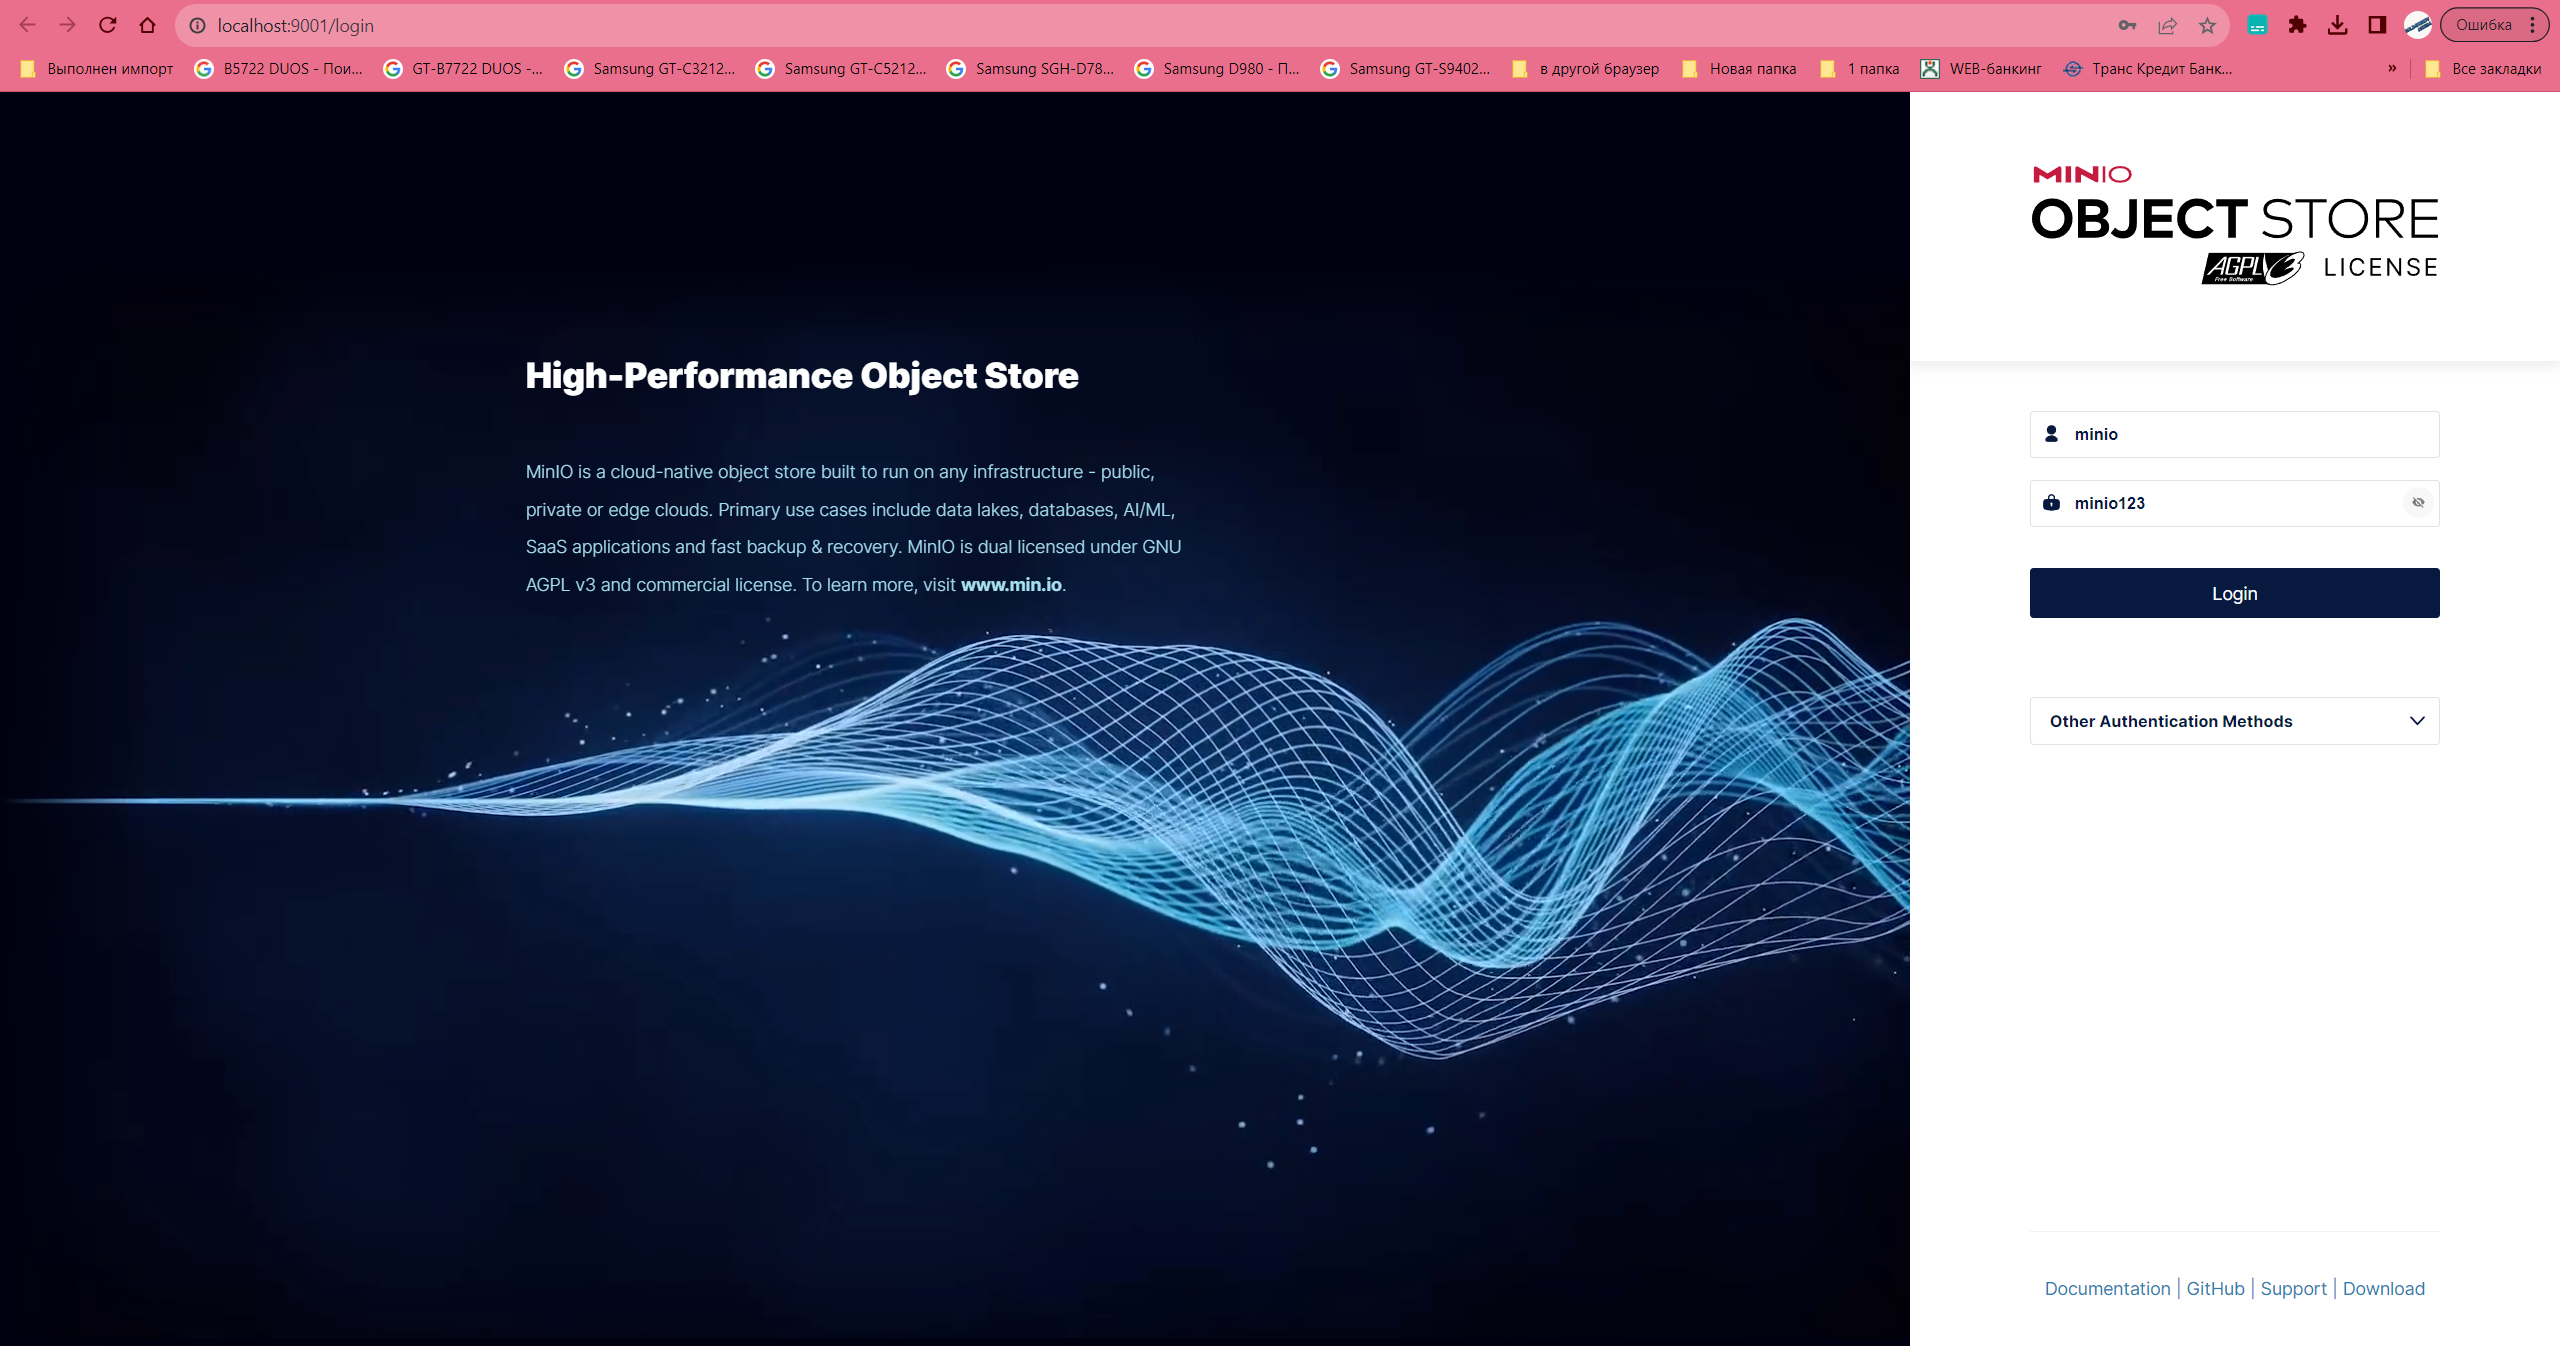

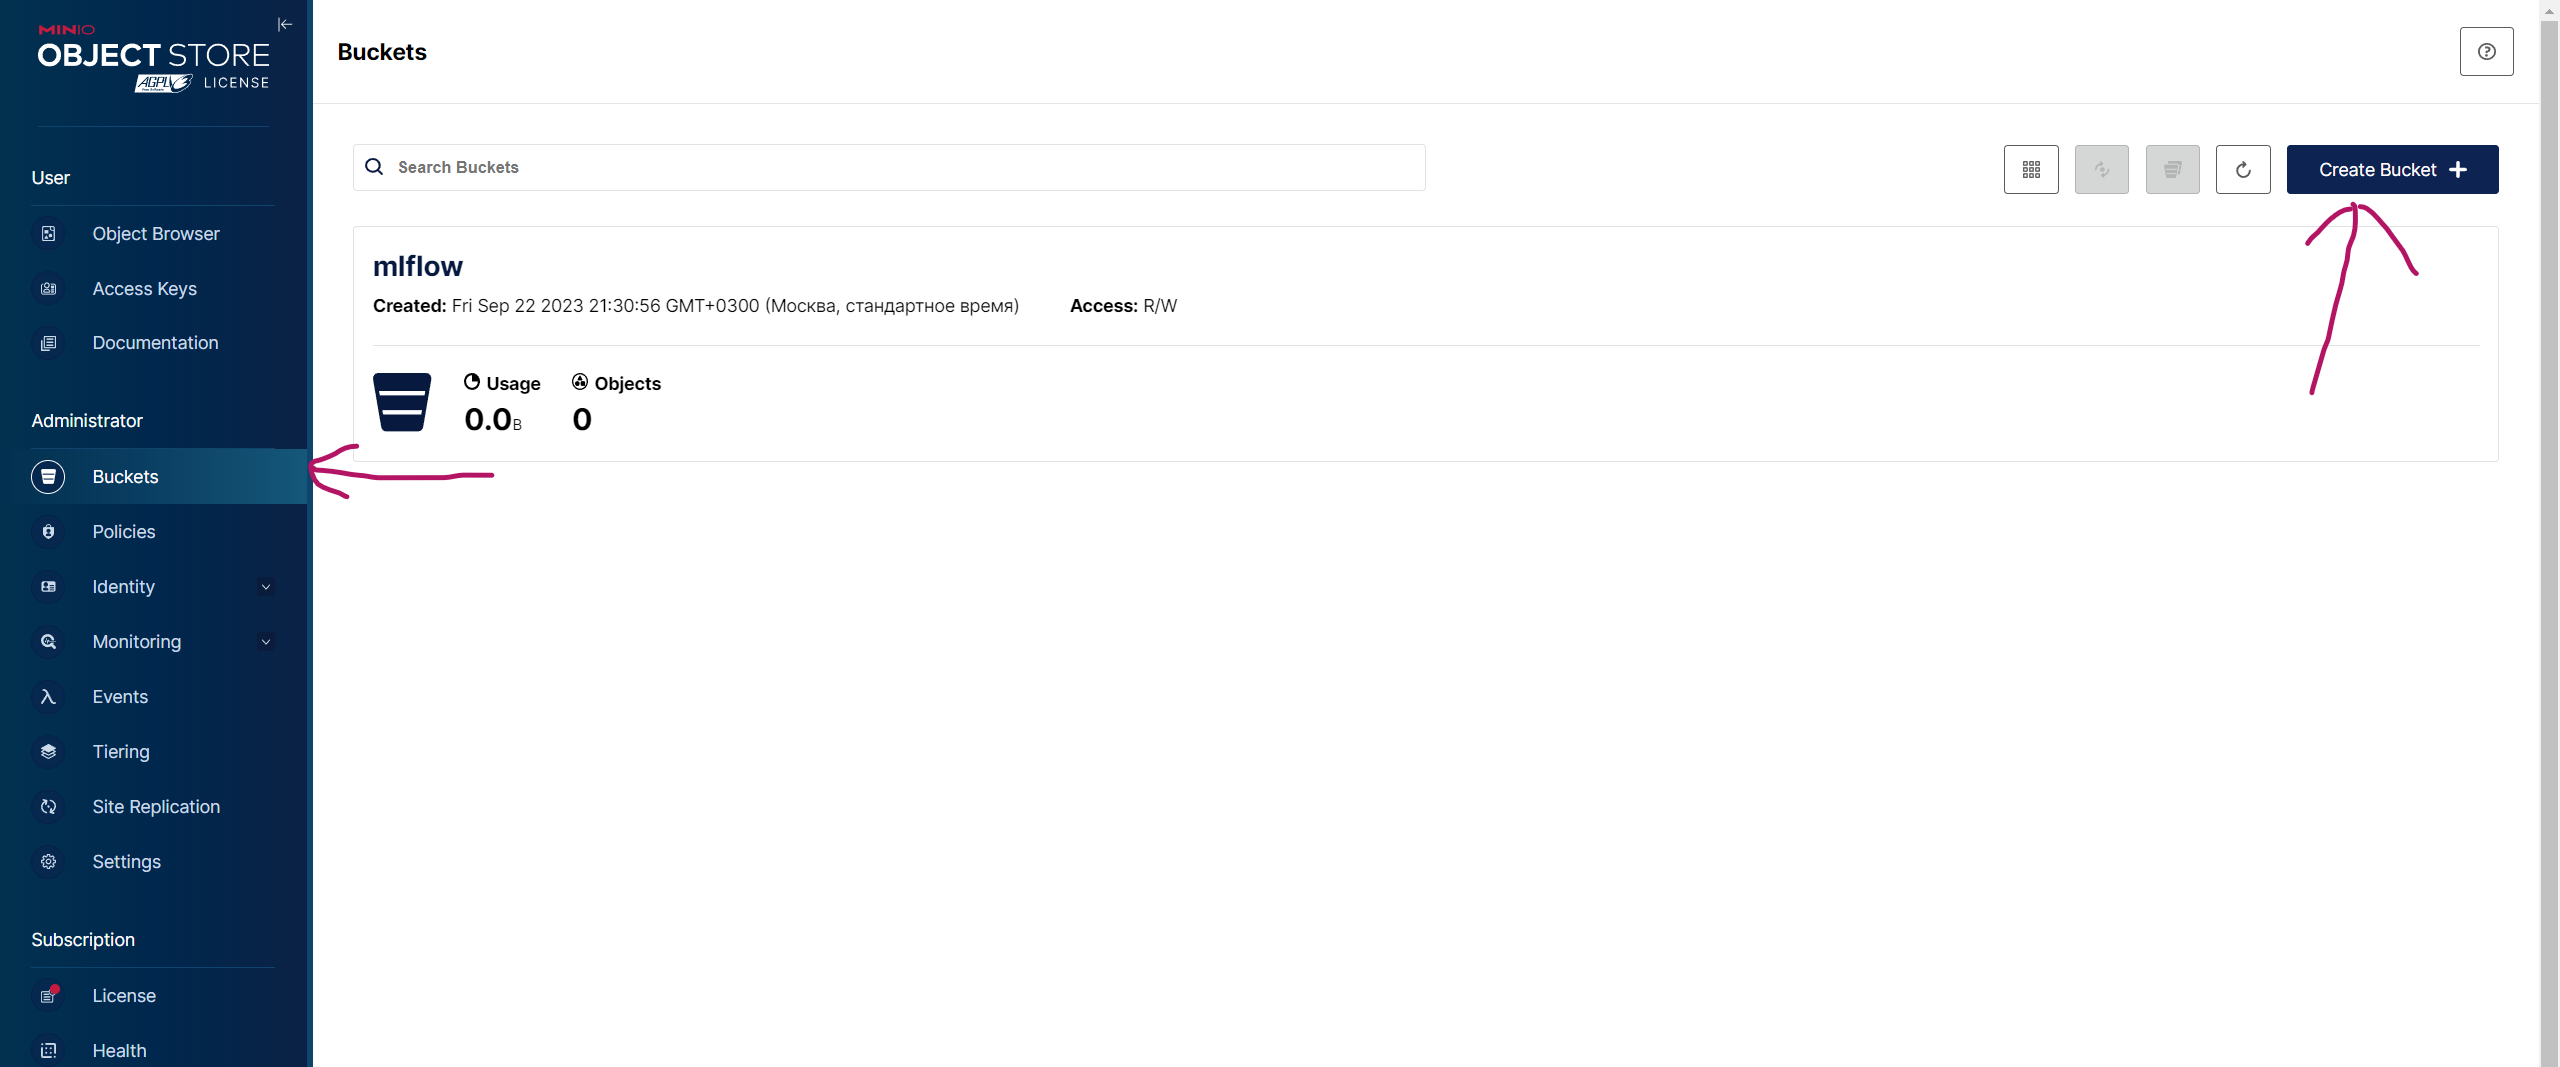

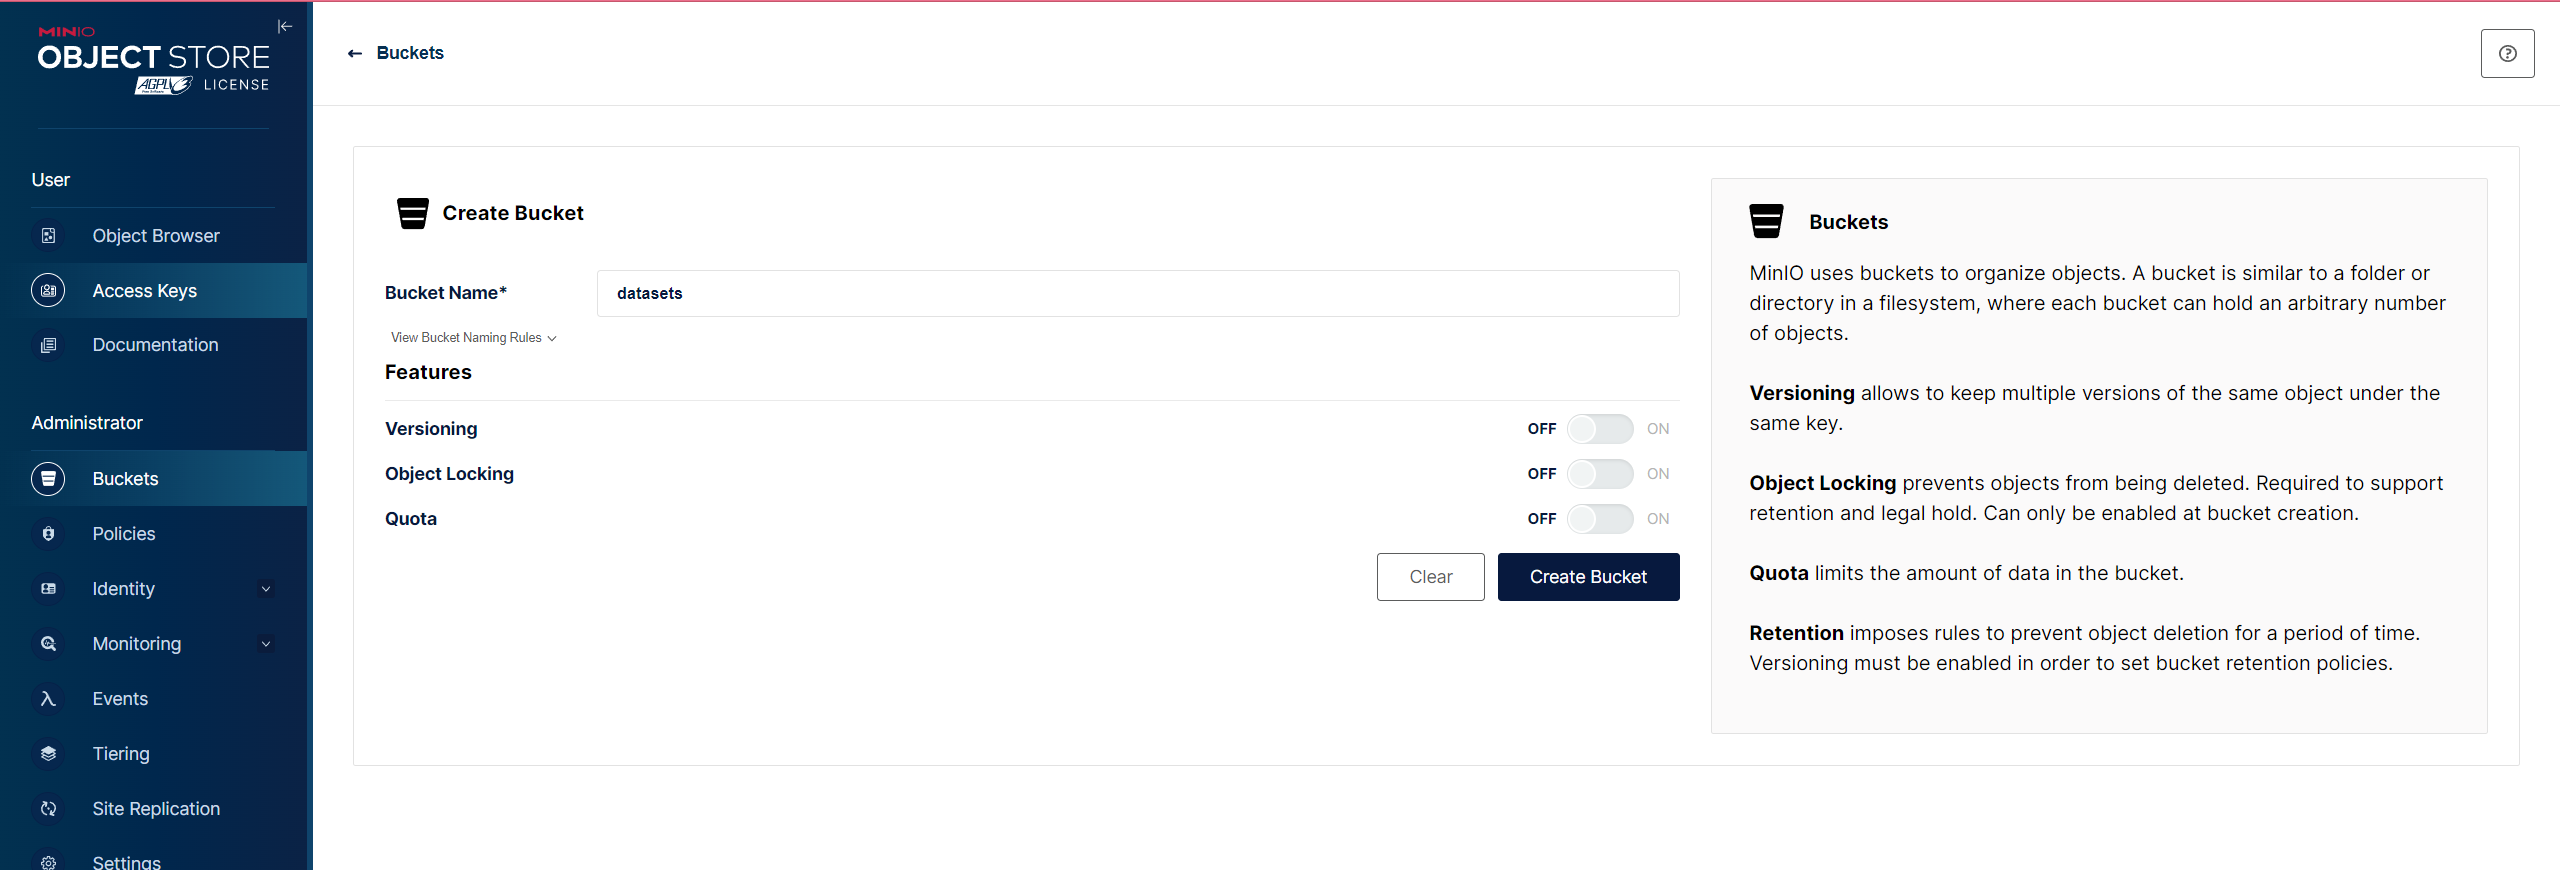

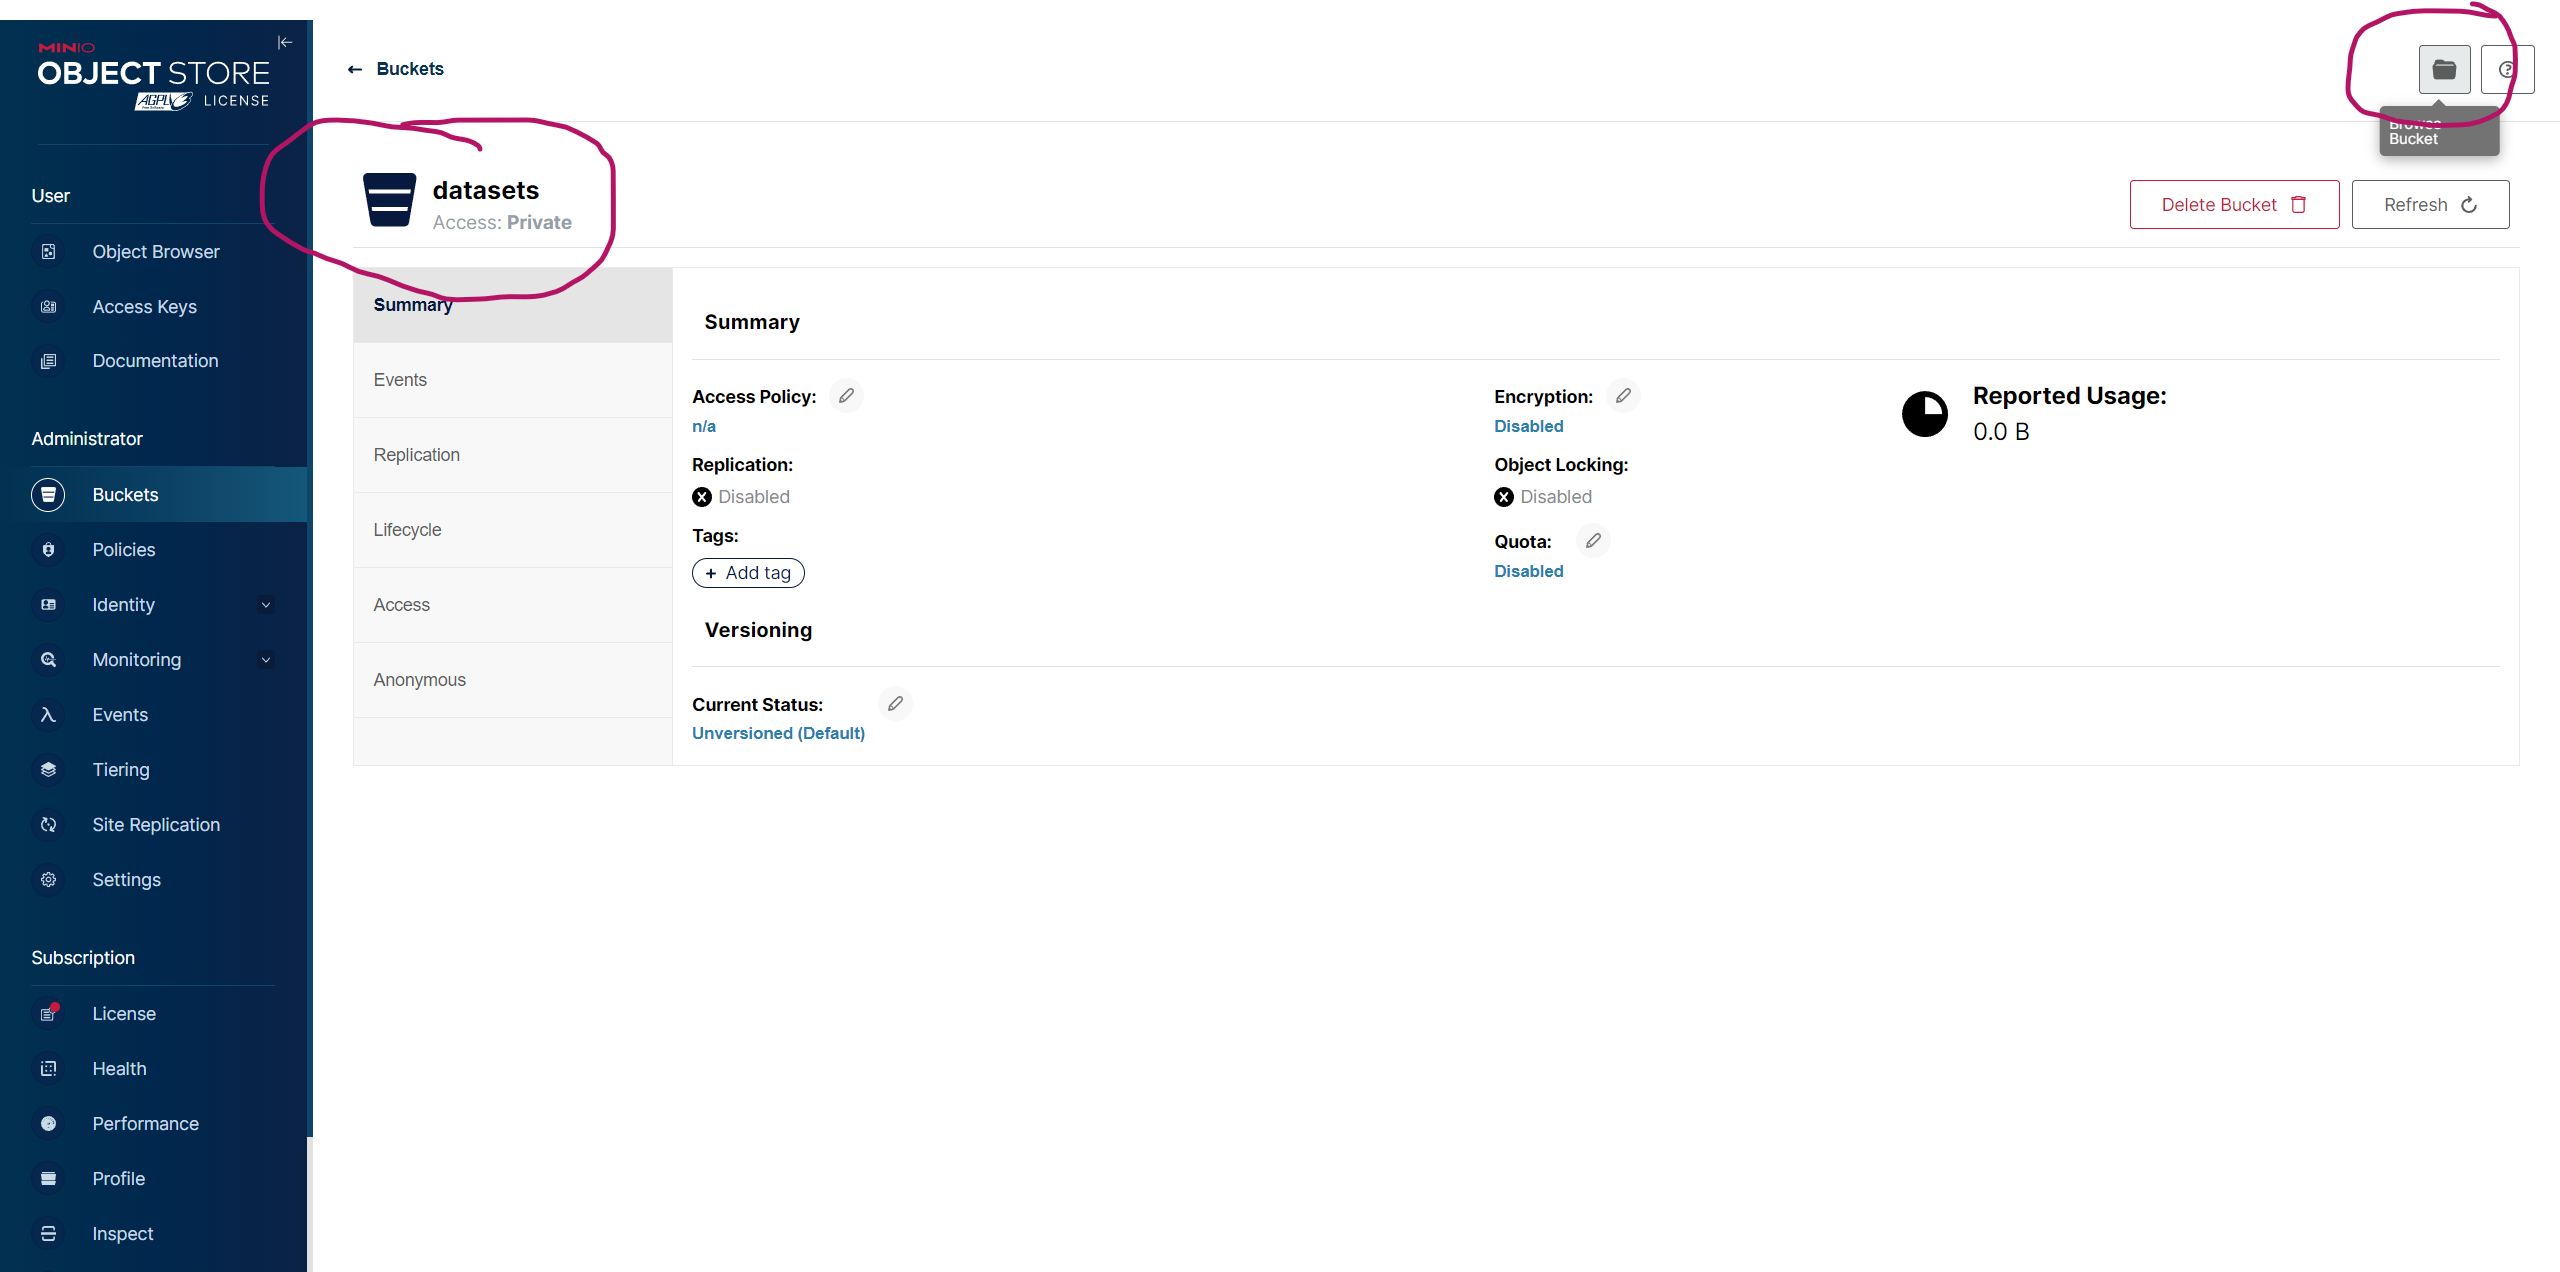

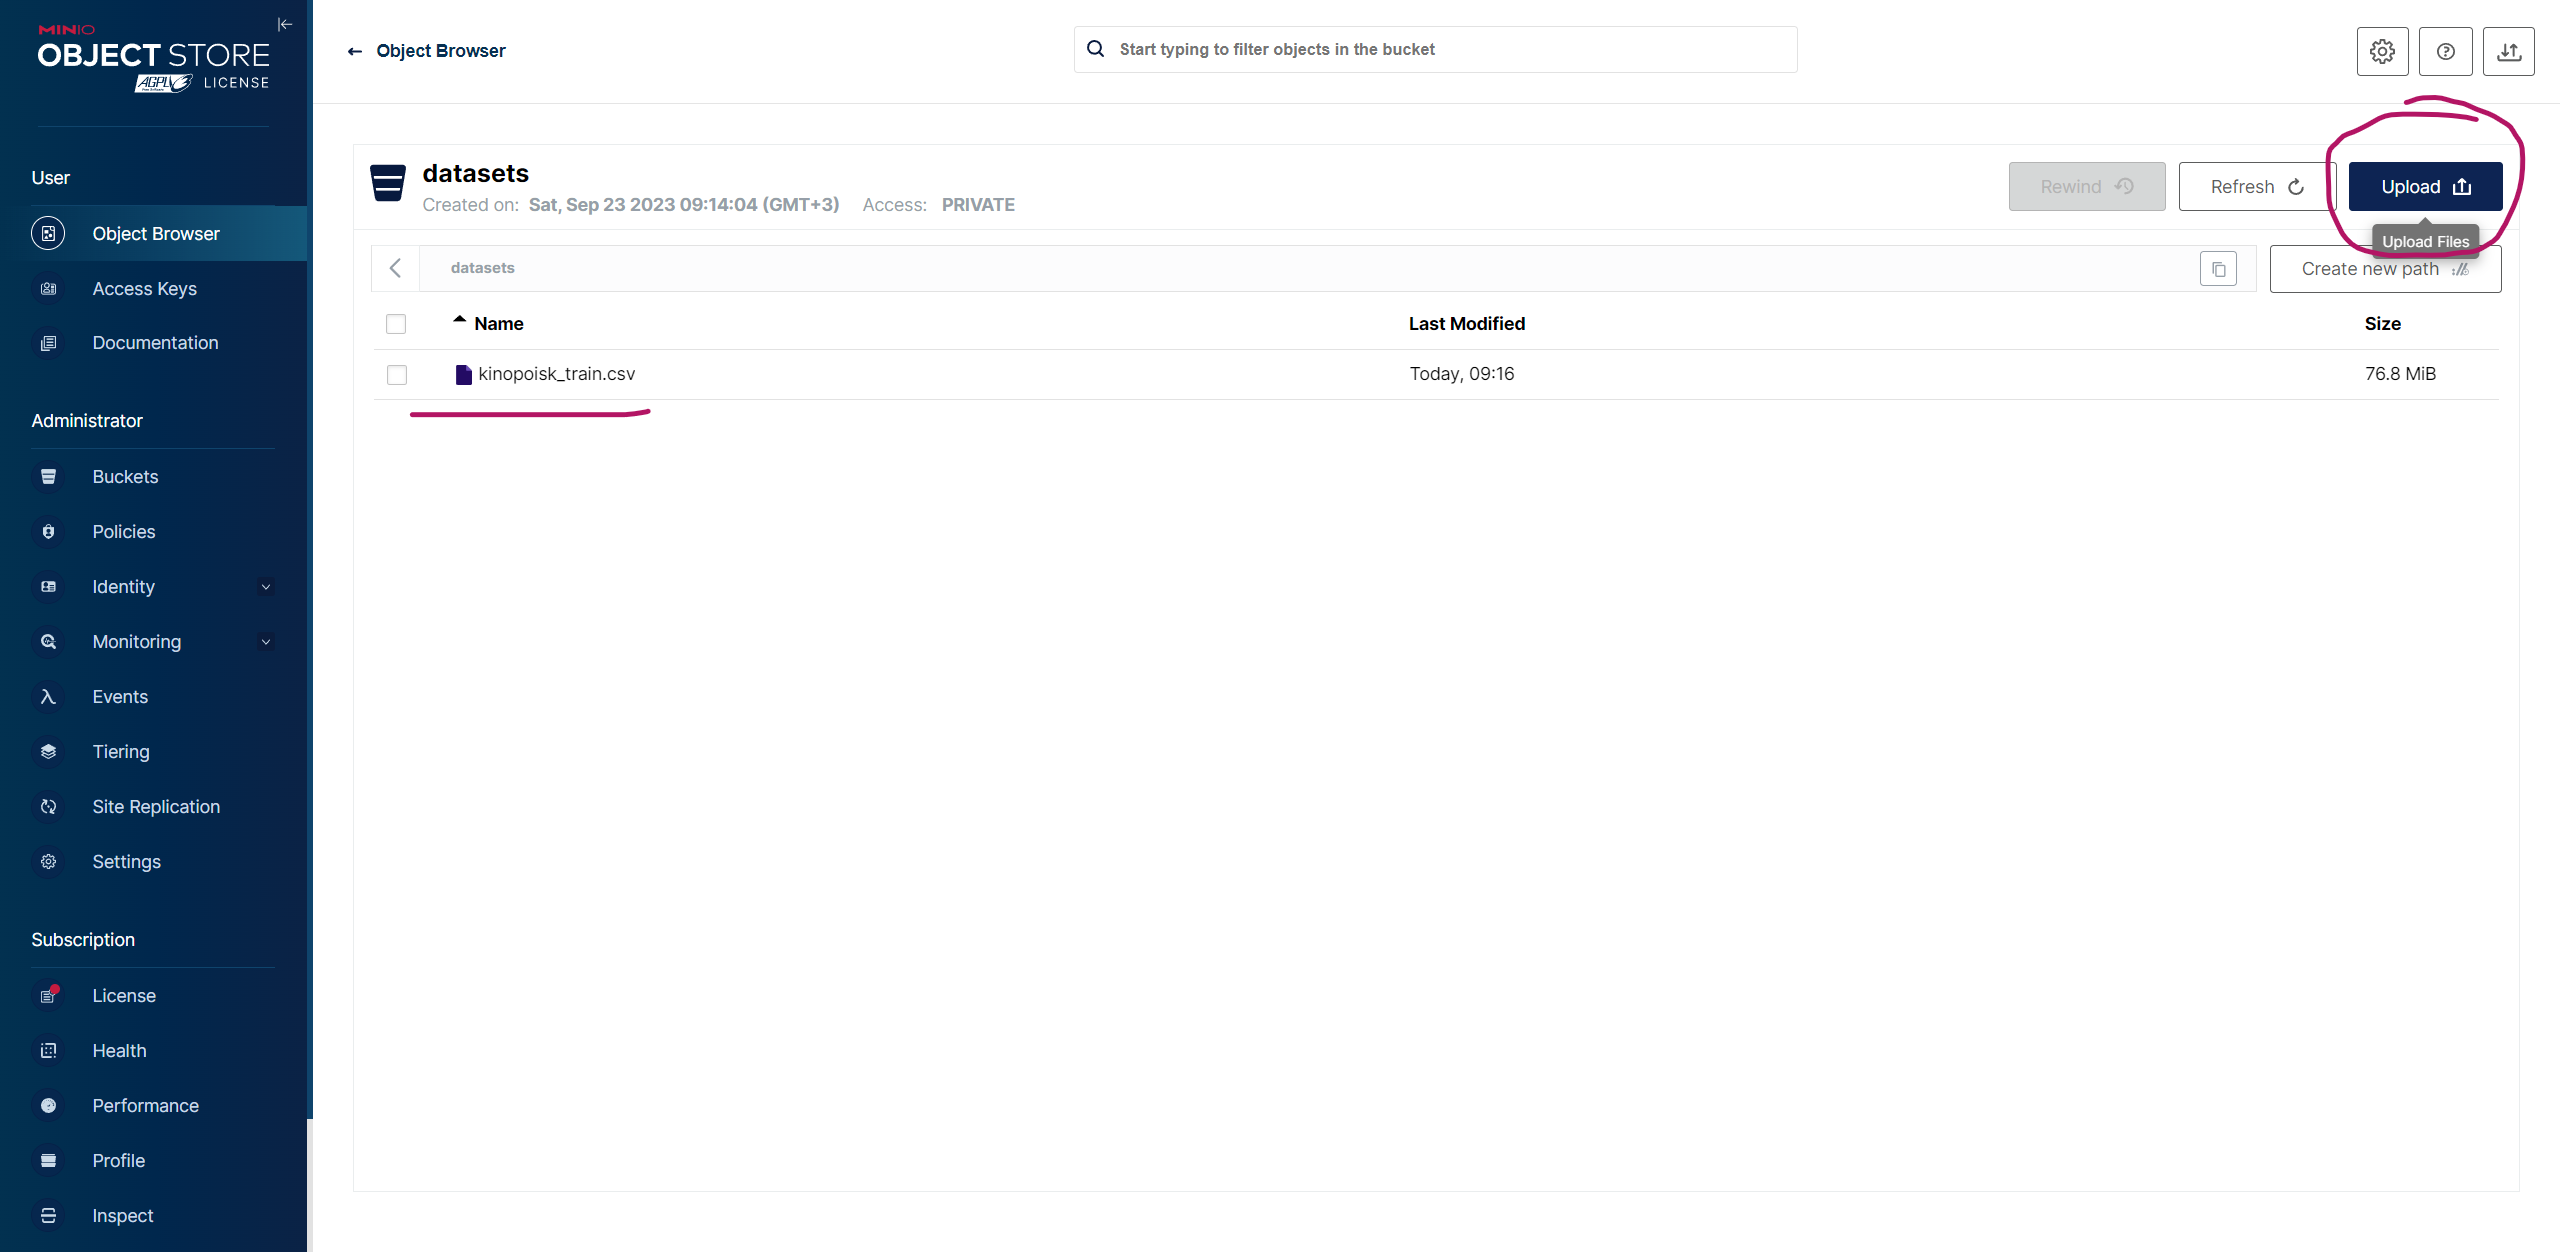

# 1. Считывание данных из объектного хранилища

In [15]:
import boto3
import pandas as pd
from io import StringIO


# Инициализация клиента
s3 = boto3.client('s3',
                  endpoint_url='http://localhost:9000',
                  aws_access_key_id='Danil123',
                  aws_secret_access_key='Danil123')

# Считывание данных
obj = s3.get_object(Bucket='mlflow', Key='kinopoisk_train.csv')
data = obj['Body'].read().decode('utf-8')
df = pd.read_csv(StringIO(data))

In [14]:
!pip list

Package                       Version
----------------------------- ---------------
alabaster                     0.7.12
anaconda-client               1.11.1
anaconda-navigator            2.4.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.11.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautifulsoup4                4.11.1
binaryornot                   0.4.4
black                         22.6.0
bleac

In [16]:
df

review sentiment
0      Смотрел фильм несколько раз, с первого раза вы...       neu
1      Я даже не знаю с чего начать... Сериал этот я ...       neg
2      Одна вещь порождает следующую. Человек имеет с...       pos
3      «Журнал 64», как и вся серия адаптации книг эт...       neg
4      Однажды утром просматривая почту, Дон Джонстон...       pos
...                                                  ...       ...
19746  Перед нами одна из многочисленных короткометра...       pos
19747  Очень редко смотрю современные комедии - как н...       pos
19748  При просмотре третьей части меня никак не поки...       neg
19749  Как всегда поражаюсь удивительной сдержанности...       pos
19750  'Тварь я дрожащая или право имеющий?' — вот ка...       neu

[19751 rows x 2 columns]

# 2. Построение модели

In [3]:
!pip install mlflow==2.6.0 --user
!pip install boto3==1.28.39 --user

     ---------------------------------------- 18.3/18.3 MB 8.0 MB/s eta 0:00:00
     ---------------------------------------- 41.2/41.2 kB ? eta 0:00:00
     ---------------------------------------- 150.3/150.3 kB ? eta 0:00:00
     ---------------------------------------- 57.7/57.7 kB ? eta 0:00:00
     -------------------------------------- 148.1/148.1 kB 8.6 MB/s eta 0:00:00
     -------------------------------------- 226.8/226.8 kB 7.0 MB/s eta 0:00:00
     -------------------------------------- 413.4/413.4 kB 6.5 MB/s eta 0:00:00
     ---------------------------------------- 21.5/21.5 MB 4.6 MB/s eta 0:00:00
     -------------------------------------- 190.6/190.6 kB 2.9 MB/s eta 0:00:00
     ---------------------------------------- 78.6/78.6 kB 4.6 MB/s eta 0:00:00
     -------------------------------------- 151.7/151.7 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 62.7/62.7 kB 3.3 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
!where python

c:\ProgramData\anaconda3\python.exe
C:\Users\work\AppData\Local\Microsoft\WindowsApps\python.exe


In [5]:
!pip show boto3

Name: boto3
Version: 1.28.39
Summary: The AWS SDK for Python
Home-page: https://github.com/boto/boto3
Author: Amazon Web Services
Author-email: 
License: Apache License 2.0
Location: c:\users\work\appdata\roaming\python\python310\site-packages
Requires: botocore, jmespath, s3transfer
Required-by: 


In [17]:
# Установка переменных окружения в Unix-подобных системах (Mac, Linux)
!export MLFLOW_TRACKING_URI=http://localhost:5050/
!export MLFLOW_S3_ENDPOINT_URL=http://localhost:9000


"export" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.
"export" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


In [18]:
# Установка переменных окружения в Windows
import os

os.environ['MLFLOW_TRACKING_URI'] = 'http://localhost:5050/'
os.environ['MLFLOW_S3_ENDPOINT_URL'] = 'http://localhost:9000'
os.environ['AWS_ACCESS_KEY_ID'] = 'Danil123'
os.environ['AWS_SECRET_ACCESS_KEY'] = 'Danil123'

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import mlflow
import mlflow.sklearn

X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2)

# Векторизация
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Обучение модели
clf = LogisticRegression()
clf.fit(X_train_vec, y_train)

# Предсказание
y_pred = clf.predict(X_test_vec)

# Настройка клиента boto3
boto3.setup_default_session(
    aws_access_key_id='Danil123',
    aws_secret_access_key='Danil123',
    region_name='us-west-1'  # или другой регион, если это применимо
)

# Логирование в MLflow
with mlflow.start_run() as run:
    # Логирование параметров и метрик
    mlflow.log_param("model_type", "LogisticRegression")
    mlflow.log_metric("accuracy", accuracy_score(y_test, y_pred))
    
    # Логирование модели
    mlflow.sklearn.log_model(clf, "model", registered_model_name="MyFirstModel")

c:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\ProgramData\anaconda3\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Successfully registered model 'MyFirstModel'.
2023/11/18 21:08:29 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: MyFirstModel, version 1
Created version '1' of model 'MyFirstModel'.


В этом примере:

1. Мы начинаем новый запуск MLflow с помощью mlflow.start_run().
2. Мы логируем параметры и метрики с помощью mlflow.log_param и mlflow.log_metric.
3. Мы логируем модель с помощью mlflow.sklearn.log_model, указывая объект модели (clf), путь к артефакту ("model"), и зарегистрированное имя модели ("MyFirstModel").

Этот код сохранит вашу модель в MinIO в соответствии с настройками MLflow, которые вы предоставили ранее.

In [20]:
accuracy_score(y_test, y_pred)

0.7580359402682865

# 3. Сохранение модели
Как вы уже знаете, MLflow позволяет легко сохранять модели. В приведенном выше коде мы использовали mlflow.sklearn.log_model для сохранения модели.

### Модель в minio ui
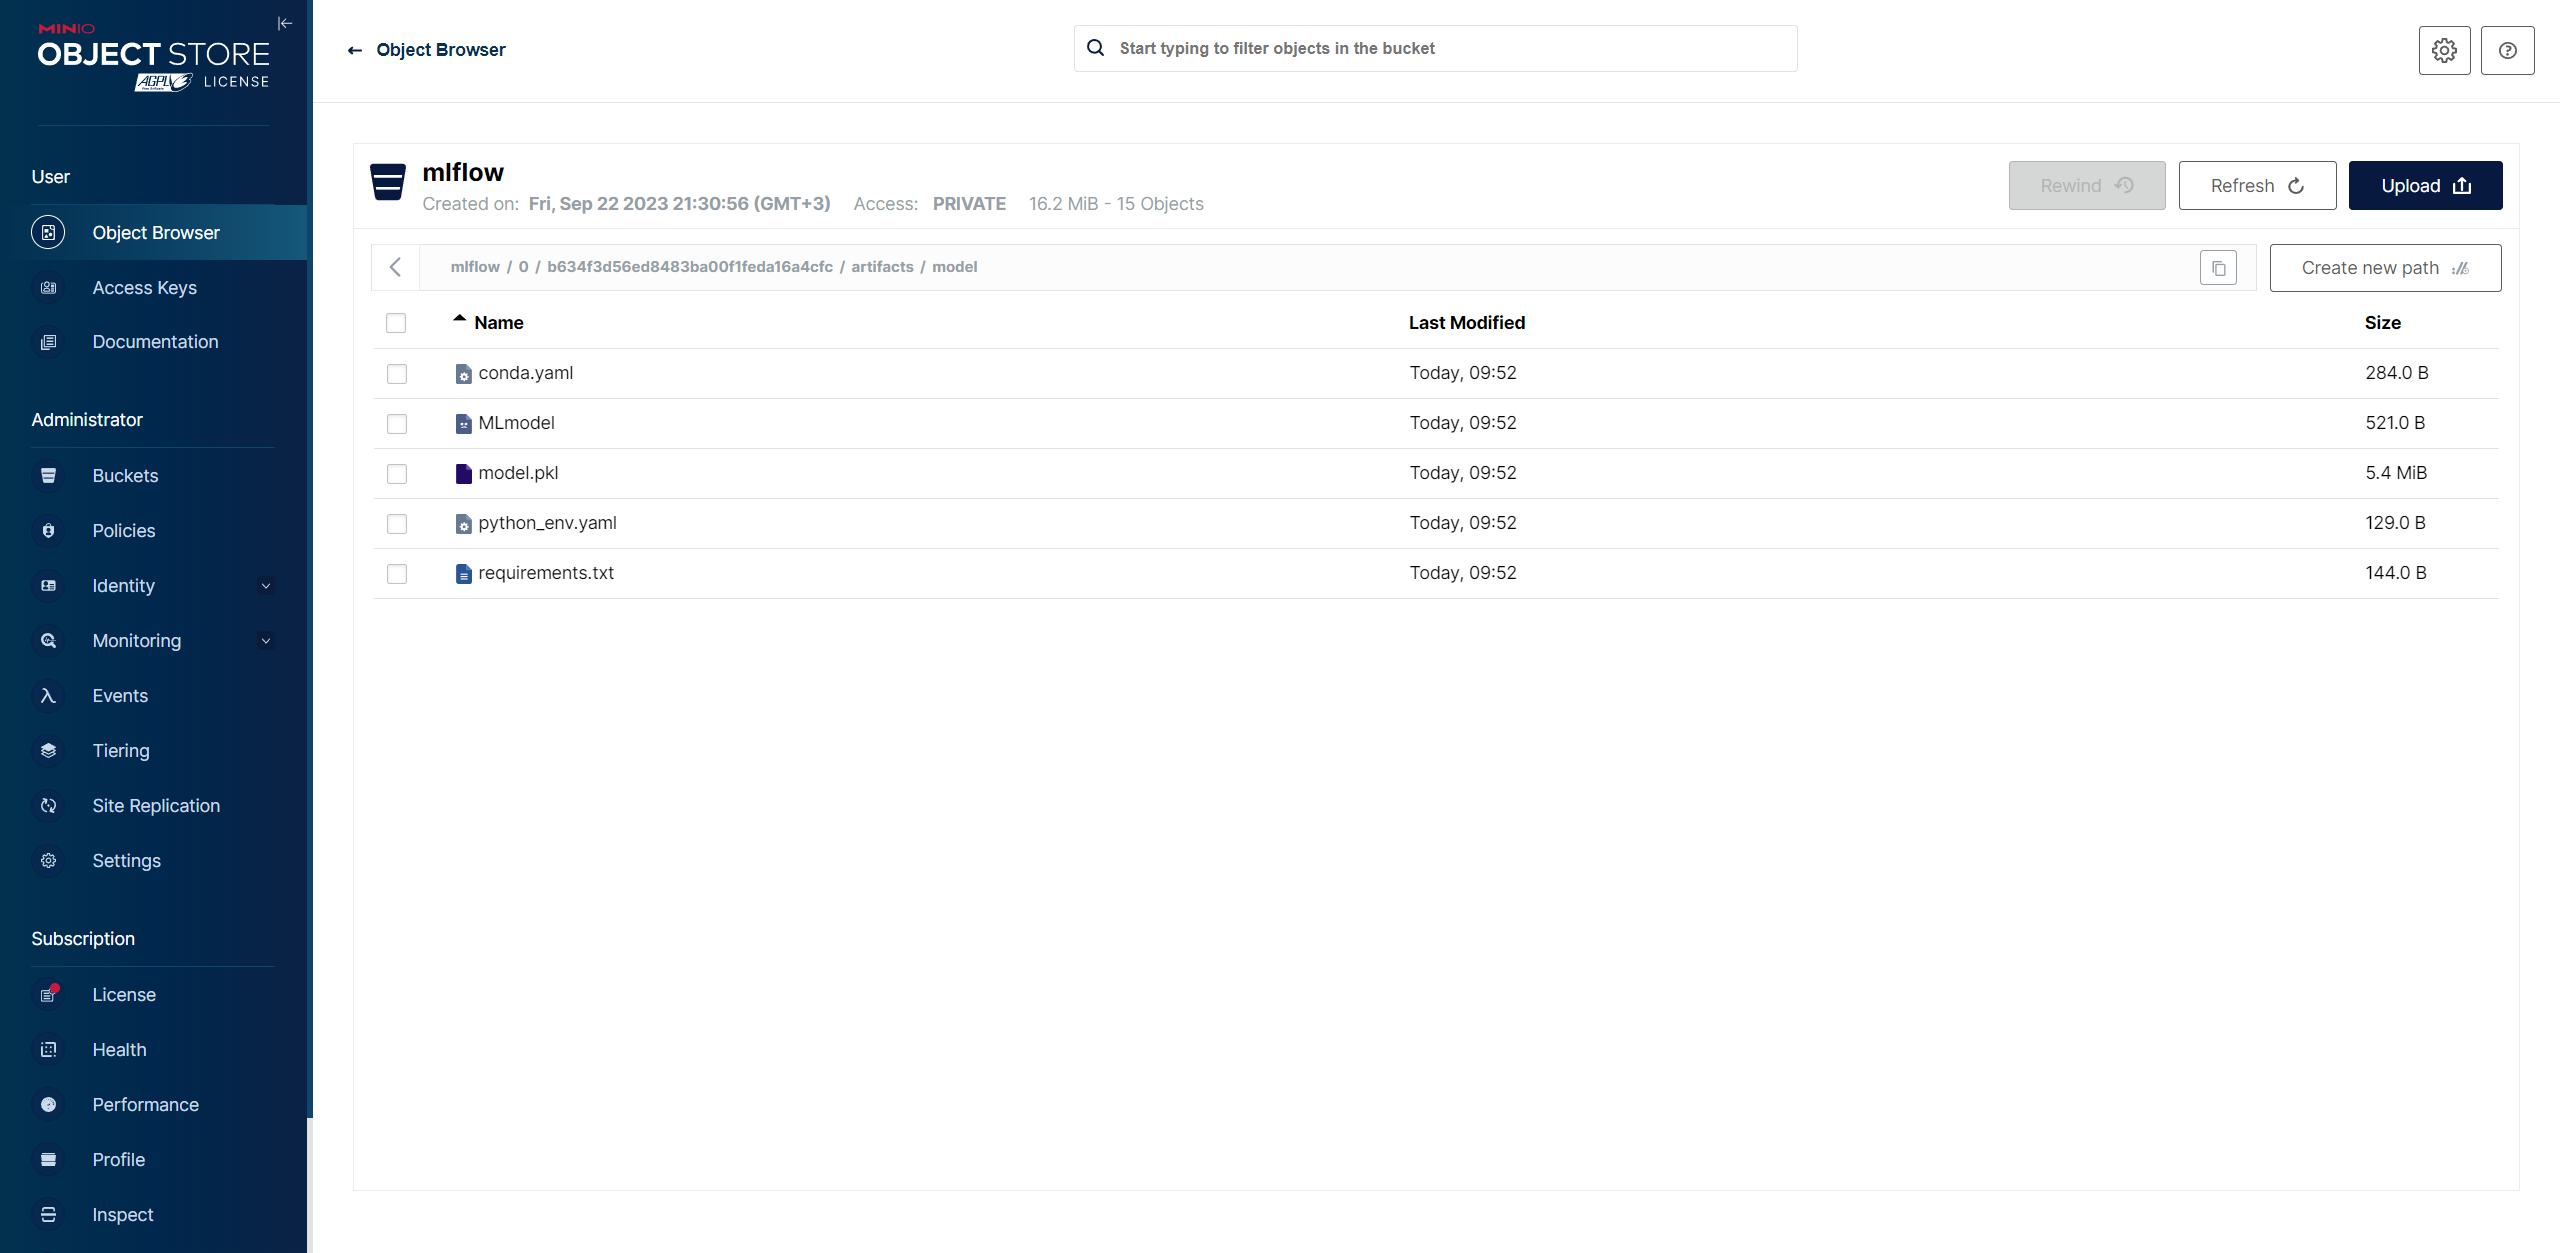